Due to covid-19 LMB consulting has run out of profit and needs to cut down some staff to stay in the market. Based on staff performance, which of the staff should be sent a notice.
Predict an employee's retention using the complete data analysis pipeline and logistic regression. The pipeline is as follow:
1. Data analysis
2. Feature engineering
3. feature engineering
4. Model building
5. Model deployment

**STAGE 1: DATA ANALYSIS**
1. check for Missing values
2. All the numerical values
3. check the distribution of the numerical variables
4. categorical variables
5. cardinality of categorical variables
6. check for outliers
7. Relationship between independent and dependent feature.

In [44]:
#Data analysis phase- let's understand the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [23]:
df = pd.read_csv('employee_retention_analysis_data_analysis_pipeline.csv')

In [24]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2.0,157,3.0,0.0,1.0,0.0,sales,low
1,0.80,0.86,5.0,262,6.0,0.0,1.0,0.0,sales,medium
2,0.11,0.88,7.0,272,4.0,0.0,1.0,0.0,sales,medium
3,0.72,0.87,5.0,223,5.0,0.0,NaN,0.0,sales,low
4,0.37,0.52,2.0,,3.0,0.0,1.0,0.0,sales,low


In [25]:
 df.shape

(14999, 10)

In [47]:
#Cheking for missing values in each feature
feature_with_null_values = []
for feature in df.columns:
  if(df[feature].isnull().sum() > 1):
    feature_with_null_values.append(feature)
    print(feature, " has ", df[feature].isnull().mean(), "% percentege of missing values")
  else:
    print("no missling values in the dataset")
print(feature_with_null_values)

      


satisfaction_level  has  0.0014000933395559704 % percentege of missing values
last_evaluation  has  0.0023334888992599507 % percentege of missing values
number_project  has  0.002466831122074805 % percentege of missing values
average_montly_hours  has  0.0017334488965931062 % percentege of missing values
time_spend_company  has  0.0013334222281485431 % percentege of missing values
Work_accident  has  0.0010000666711114075 % percentege of missing values
left  has  0.00046669777985199013 % percentege of missing values
promotion_last_5years  has  0.0003333555570371358 % percentege of missing values
Department  has  0.001600106673778252 % percentege of missing values
salary  has  0.002866857790519368 % percentege of missing values
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'Department', 'salary']


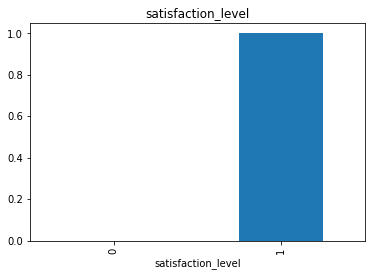

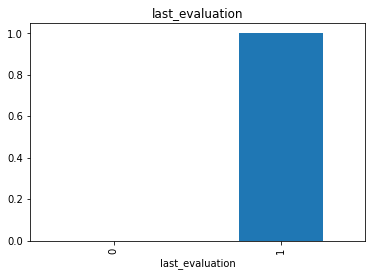

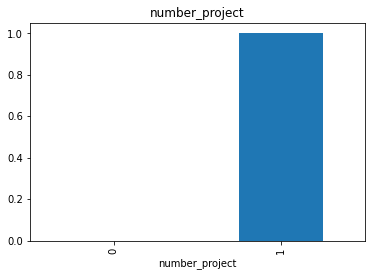

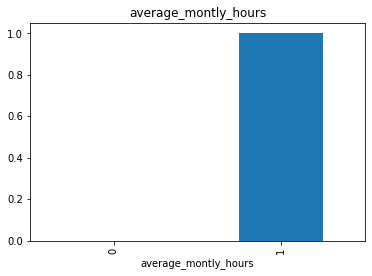

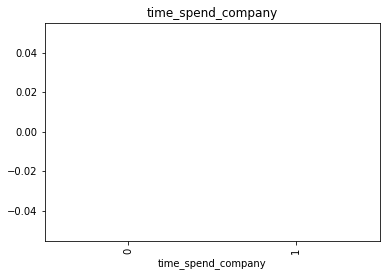

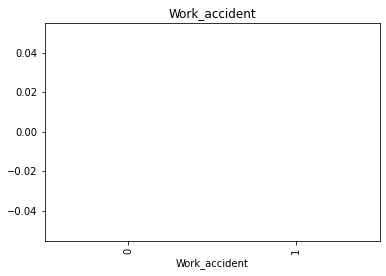

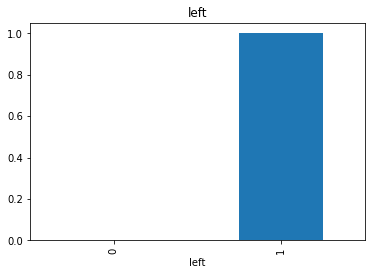

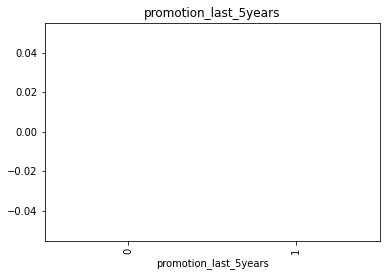

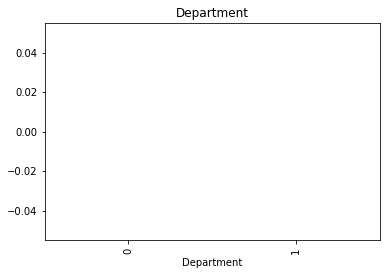

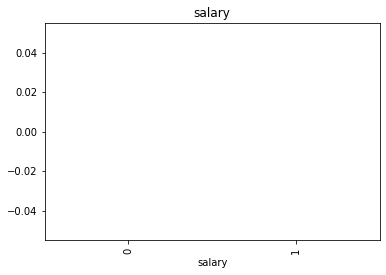

In [50]:
  #Lets check if the missing values have any relationship with the dependent values (left)
  for feature in feature_with_null_values:
    #lets create a copy of the dataset
    data_copy = df.copy()

    #represent missling values with 1 and non missing values with 0, so we can easily see their relationship with the missingvalues
    data_copy[feature] = np.where(data_copy[feature].isnull(), 1, 0)

    #calculate the median 'left value' of where the data is missing or present to see of there is a strong replationship
    data_copy.groupby(feature)['left'].median().plot.bar()
    plt.title(feature)
    plt.show()
